<h1> Gaming Genre Popularity </h1>

In [6]:
from module_functions import type_statistic, population_distribution, sampling_distribution 


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

<h3>Relevant Dataframe and Series</h3>

In [7]:

year = list(range(2000, 2025))
num_sales = list(range(7, 135))
#print (year, num_sales)
genre = ["Sports", "2d platform", "Racing", "RPG", "JRPG", "Rhythm","Simulation", "Shooters", "Puzzle", "Misc", "Action", "Fighting", "Survival", "MMORPG", "Strategy", "Battle Royal", "Sandbox", "Horror"]
console = ['PC', 'Switch', 'Playstation Series', 'Nintendo 2DS XL', 'Steam Deck', 'Xbox Series']

Video_game_Df = pd.DataFrame({'Genre': np.random.choice(genre, 1000, replace=True), 
                            'Year': np.random.choice(year, 1000, replace=True),  
                            'Console': np.random.choice(console, 1000, replace=True),
                            'USA_sales': np.random.choice(num_sales, 1000, replace=True),
                            'JP_sales': np.random.choice(num_sales, 1000, replace=True),
                            'Europe_sales': np.random.choice(num_sales, 1000, replace=True),
                            'Other_sales': np.random.choice(num_sales, 1000, replace=True)
                            })

add_ons = pd.DataFrame( [[1995,"Historical", 'Switch'],
                        [1996, "Comedy", 'PC'],
                        [1997, "Romance", 'PC'],
                        [1998, "Fantasy", 'Playstation Series'],
                        [1999, 'Point and click', 'Steam Deck']],
                        
                        columns = ['Year','Genre','Console'])
print(add_ons)

#Video_game_Df['Global_sales'] = Video_game_Df.sum(axis=1, numeric_only=True) Numeric adds year too, invalid
Video_game_Df["Global_sales"] = Video_game_Df.USA_sales + Video_game_Df.JP_sales + Video_game_Df.Europe_sales + Video_game_Df.Other_sales #print(Video_game_df['Global_sales'])
Video_game_Df[['Genre', 'Year', 'Console']] = Video_game_Df[['Genre', 'Year', 'Console']].apply(lambda x: x.astype('string'))
ord_by_year = Video_game_Df.sort_values(by='Year',ascending=True) #print(ord_by_year)
ord_by_console = Video_game_Df.sort_values(by='Console',ascending=True) #print(ord_by_console)

# General Information 
print(Video_game_Df.shape)
print(Video_game_Df.info())
print(round(Video_game_Df.describe(), 4))

print(Video_game_Df.head())
print(Video_game_Df.tail())


# Individual console series
pc = Video_game_Df[Video_game_Df.Console == 'PC'].reset_index()
switch = Video_game_Df[Video_game_Df.Console == 'PC'].reset_index()
playstation = Video_game_Df[Video_game_Df.Console == 'PC'].reset_index()
nintendo2D_xl = Video_game_Df[Video_game_Df.Console == 'PC'].reset_index()
s_deck = Video_game_Df[Video_game_Df.Console == 'PC'].reset_index()
xbox = Video_game_Df[Video_game_Df.Console == 'PC'].reset_index()

# Individual genre series
sports = Video_game_Df[Video_game_Df['Genre'] == 'Sports'].reset_index()
platform_2d = Video_game_Df[Video_game_Df['Genre'] == '2d platform'].reset_index()
Racing = Video_game_Df[Video_game_Df['Genre'] == 'Racing'].reset_index()
rpg = Video_game_Df[Video_game_Df['Genre'] == 'RPG'].reset_index()
jrpg = Video_game_Df[Video_game_Df['Genre'] == 'JRPG'].reset_index()
rhythm = Video_game_Df[Video_game_Df['Genre'] == 'Rhythm'].reset_index()
other = Video_game_Df[Video_game_Df['Genre'] == 'Misc'].reset_index()
simulation = Video_game_Df[Video_game_Df['Genre'] == 'Simulation'].reset_index()
shooters = Video_game_Df[Video_game_Df['Genre'] == 'Shooters'].reset_index()
puzzle = Video_game_Df[Video_game_Df['Genre'] == 'Puzzle'].reset_index()
action = Video_game_Df[Video_game_Df['Genre'] == 'Action'].reset_index()
fighting = Video_game_Df[Video_game_Df['Genre'] == 'Fighting'].reset_index()
survival = Video_game_Df[Video_game_Df['Genre'] == 'Survival'].reset_index()
mmorpg = Video_game_Df[Video_game_Df['Genre'] == 'MMORPG'].reset_index()
strategy = Video_game_Df[Video_game_Df['Genre'] == 'Strategy'].reset_index()
battle = Video_game_Df[Video_game_Df['Genre'] == 'Battle'].reset_index()
sandbox = Video_game_Df[Video_game_Df['Genre'] == 'Sandbox'].reset_index()
horror = Video_game_Df[Video_game_Df['Genre'] == 'Horror'].reset_index()

print(pc) # individuals series of Console choice
print(sports) ## individuals series of Genre choice

   Year            Genre             Console
0  1995       Historical              Switch
1  1996           Comedy                  PC
2  1997          Romance                  PC
3  1998          Fantasy  Playstation Series
4  1999  Point and click          Steam Deck
(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genre         1000 non-null   string
 1   Year          1000 non-null   string
 2   Console       1000 non-null   string
 3   USA_sales     1000 non-null   int32 
 4   JP_sales      1000 non-null   int32 
 5   Europe_sales  1000 non-null   int32 
 6   Other_sales   1000 non-null   int32 
 7   Global_sales  1000 non-null   int32 
dtypes: int32(5), string(3)
memory usage: 43.1 KB
None
       USA_sales   JP_sales  Europe_sales  Other_sales  Global_sales
count  1000.0000  1000.0000      1000.000    1000.0000     1000.0000
me

<h3>Modifying Dataframes</h3>

  Genre  count
0  Misc     68
           Genre  count
0           Misc     68
1     Simulation     64
2       Strategy     63
3         Sports     62
4         Racing     60
5       Shooters     60
6        Sandbox     59
7       Fighting     57
8         Action     57
9         Puzzle     56
10          JRPG     55
11        Horror     53
12      Survival     52
13        Rhythm     52
14           RPG     49
15        MMORPG     48
16  Battle Royal     46
17   2d platform     39
           Genre  proportion
0           Misc       0.068
1     Simulation       0.064
2       Strategy       0.063
3         Sports       0.062
4         Racing        0.06
5       Shooters        0.06
6        Sandbox       0.059
7       Fighting       0.057
8         Action       0.057
9         Puzzle       0.056
10          JRPG       0.055
11        Horror       0.053
12      Survival       0.052
13        Rhythm       0.052
14           RPG       0.049
15        MMORPG       0.048
16  Battle Royal     

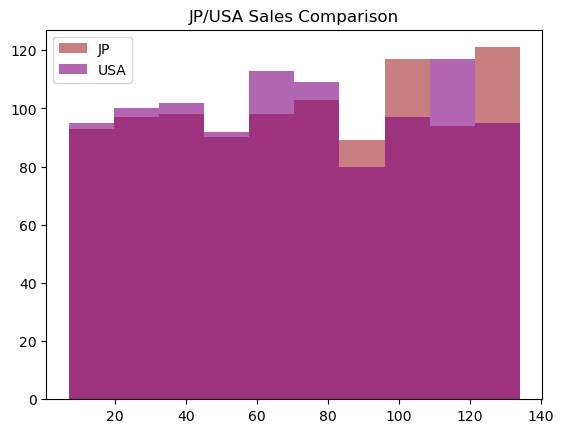

                Genre  Year             Console  USA_sales  JP_sales  \
0          Simulation  2018                  PC      115.0      83.0   
1            Strategy  2005          Steam Deck      114.0     123.0   
2              Sports  2001         Xbox Series       59.0      79.0   
3              Racing  2006              Switch        9.0      98.0   
4        Battle Royal  2024              Switch       27.0     118.0   
...               ...   ...                 ...        ...       ...   
1000       Historical  1995              Switch       50.0      50.0   
1001           Comedy  1996                  PC       50.0      50.0   
1002          Romance  1997                  PC       50.0      50.0   
1003          Fantasy  1998  Playstation Series       50.0      50.0   
1004  Point and click  1999          Steam Deck       50.0      50.0   

      Europe_sales  Other_sales  Global_sales  
0             88.0         43.0         329.0  
1             99.0         23.0        

<Figure size 640x480 with 0 Axes>

In [8]:
# Specific EDA Analysis
#Occurrence and Percentile of occurrence
genre_occurrence = Video_game_Df['Genre'].value_counts().reset_index()
genre_occurrence_percentage = Video_game_Df['Genre'].value_counts(normalize=True).reset_index()
highest_genre = genre_occurrence[genre_occurrence['count'] == genre_occurrence['count'].max()]
print(highest_genre)
print(genre_occurrence)
print(genre_occurrence_percentage)

console_occurrence = Video_game_Df['Console'].value_counts().reset_index()
console_occurrence_percentage = Video_game_Df['Console'].value_counts(normalize=True).reset_index()
highest_console = console_occurrence[console_occurrence['count'] == console_occurrence['count'].max()]
print(highest_console)
print(console_occurrence)
print(console_occurrence_percentage)
#print(Video_game_Df['Console'].value_counts().count())
#print(Video_game_Df['Genre'].value_counts().count())
"""
Alternative Percentage check
action_count = genre_occurrence[genre_occurrence['Genre'] == 'Action']['count'] 
print(percentage_of_action/genre_occurrence['count'].sum()*100)
"""

#Groupby Differences and Merges Comparisons
genre_jp_avg = Video_game_Df.groupby(['Genre']).JP_sales.mean().reset_index()
print(genre_jp_avg)
# Between genre and jp sales, print highest and lowest average
print(genre_jp_avg[genre_jp_avg.JP_sales == genre_jp_avg.JP_sales.min()])
print(genre_jp_avg[genre_jp_avg.JP_sales == genre_jp_avg.JP_sales.max()])

# Grouping all sales by genre and adding sum of each 
g_jp = Video_game_Df.groupby(['Genre']).JP_sales.sum().reset_index()
g_usa = Video_game_Df.groupby(['Genre']).USA_sales.sum().reset_index()
g_eu = Video_game_Df.groupby(['Genre']).USA_sales.sum().reset_index()
g_other = Video_game_Df.groupby(['Genre']).USA_sales.sum().reset_index()
# Comparison of jp and usa sales based on genre and difference along all platforms
usa_jp_sales = pd.merge(g_jp, g_usa)
print(usa_jp_sales)
sales_diff = round(usa_jp_sales.JP_sales.sum() - usa_jp_sales.USA_sales.sum(),2)
print(sales_diff)
# Overlapping Histogram
plt.hist(Video_game_Df.JP_sales, color='brown', label='JP', alpha= .6)
plt.hist(Video_game_Df.USA_sales, color='purple', label='USA', alpha= .6)
plt.legend()
plt.title("JP/USA Sales Comparison")
plt.show()
plt.clf()


#CONCAT extra data, NAN sales replaced with integer
added_genres = pd.concat([Video_game_Df, add_ons], ignore_index=True)
added_genres.fillna(50, inplace=True) #added_genre.replace(np.nan, 0, inplace=True)
print(added_genres)

# Checking helper_function
print(type_statistic(added_genres['JP_sales'], 'Maximum'))
print(type_statistic(added_genres['JP_sales'], 'Minimum'))
print(type_statistic(added_genres['JP_sales'], 'Mean'))
print(type_statistic(added_genres['JP_sales'], 'Median'))
print(type_statistic(added_genres['JP_sales'], 'MultiMode'))
print(type_statistic(added_genres['JP_sales'], 'Quarter Quantiles'))
print(round(type_statistic(added_genres['JP_sales'], 'STD'),4))
print(round(type_statistic(added_genres['JP_sales'], 'Standard Error'),4))

#Pivoting table
#pivot() non duplicate categories and pivot_table() duplicate categories
test = Video_game_Df
print(test.pivot_table(values='Global_sales', index='Genre', columns=["Console"]))
test2 = Video_game_Df.groupby(['Genre', 'Year']).count().reset_index()
print(test2.pivot_table(index = 'Genre', columns='Year'))


<h3>Visualization Graphing of Summary Statistics</h3>

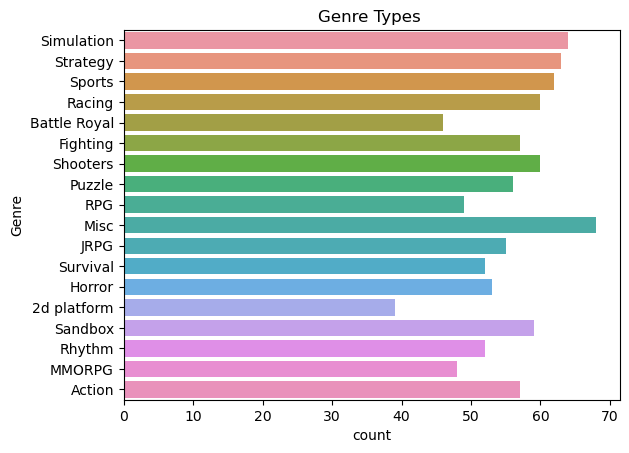

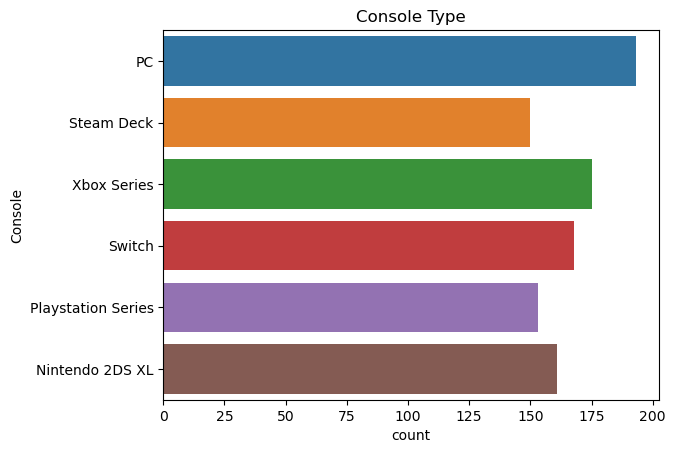

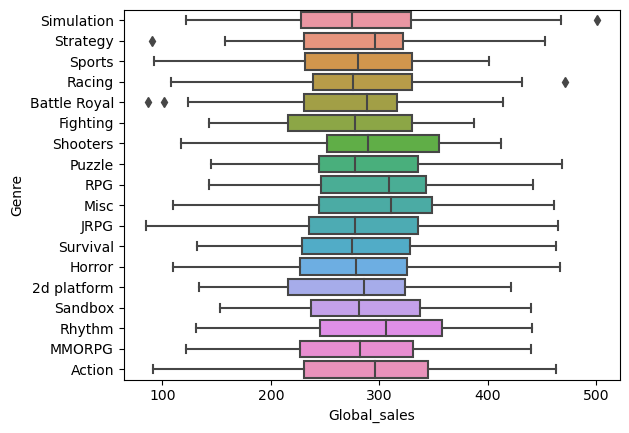

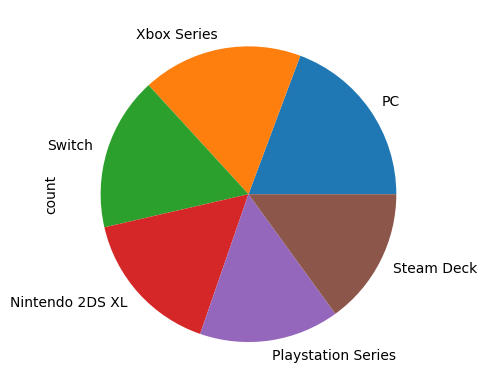

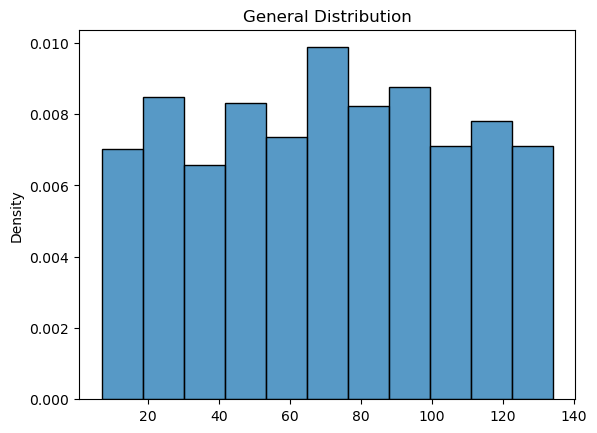

None


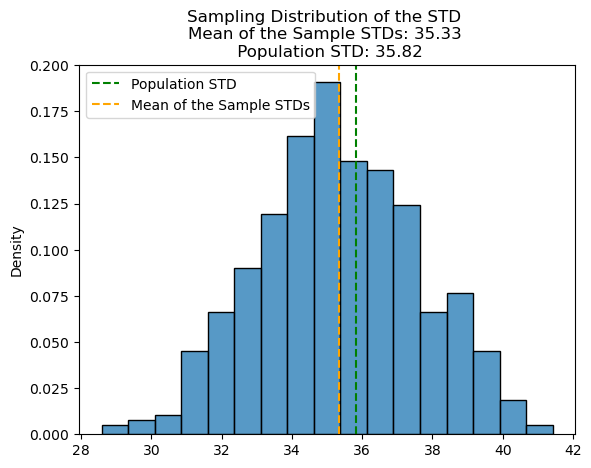

    index         Genre  Year             Console  USA_sales  JP_sales  \
0      29    Simulation  2020  Playstation Series        122        10   
1      66        Racing  2020              Switch         40        92   
2      90        MMORPG  2020         Xbox Series         61        43   
3      97          Misc  2020  Playstation Series         24        67   
4     113        Horror  2020          Steam Deck         98        57   
5     118       Sandbox  2020                  PC         77       117   
6     130      Strategy  2020  Playstation Series         80        56   
7     144          Misc  2020         Xbox Series        120        16   
8     159       Sandbox  2020         Xbox Series         40       112   
9     196           RPG  2020                  PC         35        93   
10    223    Simulation  2020     Nintendo 2DS XL        114        17   
11    226      Survival  2020          Steam Deck         44        52   
12    234        Sports  2020         

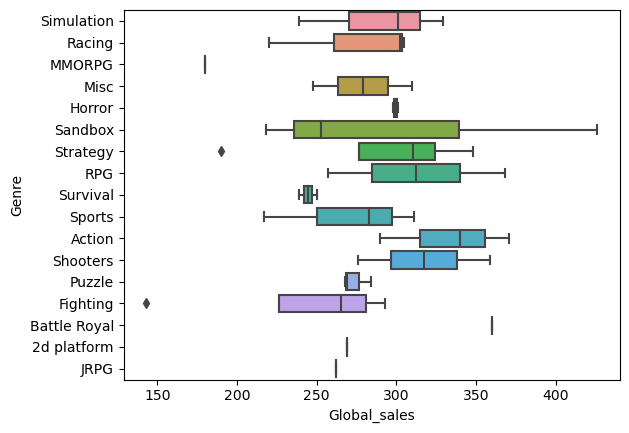

In [9]:

#Visualizations of Data
sns.countplot(y = 'Genre', data= Video_game_Df)
plt.title('Genre Types ')
plt.show()
plt.clf()

sns.countplot(y = 'Console', data = Video_game_Df)
plt.title('Console Type')
plt.show()
plt.clf()

sns.boxplot(data=Video_game_Df, x='Global_sales', y='Genre')
plt.show()
plt.close()

Video_game_Df['Console'].value_counts().plot.pie()
plt.show()
plt.clf()

# Distribution and Sample Distribution with helper_functions
game_sales = Video_game_Df['Europe_sales'] #select a sales column
print(population_distribution(game_sales))
sampling_distribution(game_sales, 50, 'STD')


#Statistic based on specific Year
year_2020 = Video_game_Df[Video_game_Df['Year'] == '2020'].reset_index()
print(year_2020)

rpg_20 = year_2020.Global_sales[Video_game_Df.Genre =='RPG']
mmorpg_20 = year_2020.Global_sales[Video_game_Df.Genre =='MMORPG']
print(rpg_20, mmorpg_20)
# Average Diff
rpg_avg = rpg_20.mean()
mmorpg_avg = mmorpg_20.mean()
diff_avg_2020 = rpg_avg - mmorpg_avg
print(rpg_avg, mmorpg_avg, diff_avg_2020)
# Side-by-Side Boxplot
sns.boxplot(data=year_2020, x='Global_sales', y='Genre')
plt.show()
plt.close()

